<font color = 'red'>
<h1>Breast Cancer Wisconsin<h1>

# Introduction




1. [BUSINESS UNDERSTANDING](#1)
1. [DATA UNDERSTANDING](#2)
    * [Import Libraries](#3)
    * [Import Dataset](#4)
    * [Descriptive Analysis](#5)
        * [Checking Skewness Basically](#6)
        * [Missing Values](#7)
        * [Descriptive Statistic](#8)
        * [Exploratary Data Analysis (EDA)](#9)
            * [Correlation Matrix](#10)
            * [3D Visualization](#11)
            * [Pair Plot](#12)
            * [Box Plot](#13)   
            * [Count Plot](#14)
1. [DATA PREPARATION](#15)
    * [Outlier Detection (LOF)](#16)
    * [Skewness & Data Transform & PowerTransformer](#17)
    * [Split The Dataset](#18)
    * [Standardization](#19)   
1. [MODELLING](#20)
    * [Select Modelling Technique](#21)
        * [Logistic Regression](#22)
        * [PCA](#23)
        * [PCA & Logistic Regression](#24)
        * [PCA & KNN](#25)
        * [NCA](#26)
        * [NCA & KNN](#27)
    * [Generate Test Design](#28)
        * [Confusion Matrix](#29)
        * [Accuracy](#30)      
1. [EVALUATION](#31)
1. [DEPLOYMENT](#32)

<a id = "1"></a><br>
## 1-) Business Understanding

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

<a id = "2"></a><br>
## 2-) Data Understanding

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

<a id = "3"></a><br>
## 2.1 import Libraries

In [ ]:
# Load Libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.offline as pyo 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)
from matplotlib.colors import ListedColormap
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import stats
from scipy.stats import norm
from scipy.stats import probplot
import scipy as stat
from scipy.stats import skew
from scipy import stats
from sklearn.preprocessing import PowerTransformer
#
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
#
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
#
import warnings
warnings.filterwarnings("ignore")
#
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

<a id = "4"></a><br>
## 2.2 import Dataset

In [ ]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head(10)

In [ ]:
# Drop Unnecessary columns
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)
df.head(10)

<a id = "5"></a><br>
## 2.3 Descriptive Analysis

In [ ]:
describe = df.describe().T
print(describe)

<a id = "6"></a><br>
## 2.3.1 Checking Skewness Basically


In [ ]:


def check_skewness(dataframe):

    global describe
    
    for i in range(describe.shape[1]):
        mean = round(describe.iloc[1,i],3)
        median = round(describe.iloc[5,i],3)
    
        if mean > median:
            print("Positive Skewness\t:\t{}\t".format(describe.columns[i]))
        elif mean == median:
            print("No Skew          \t:\t{}\t".format(describe.columns[i]))
        else:
            print("Negative Skewness\t:\t{}\t".format(describe.columns[i]))
            
check_skewness(df)

<a id = "7"></a><br>
## 2.3.2 Missing Values

In [ ]:
#df.info()
def Missing_Values_Table(df):
    missing_value = df.isnull().sum()
    missing_value_percent = 100*df.isnull().sum()/len(df)
    missing_value_table = pd.concat([missing_value,missing_value_percent],axis = 1)
    missing_value_table__ = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Percent'})
    return missing_value_table__

Missing_Values_Table(df)

<a id = "8"></a><br>
## 2.3.3 Descriptive Statistic

In [ ]:
def descriptive_statistics(dataframe, target_column, column_name):

    df_B, df_M = [i for _, i in df.groupby(dataframe[target_column])]

    # normality test (hypothesis testing)

    stat_M, p_M = shapiro(df_M[column_name])
    stat_B, p_B = shapiro(df_B[column_name])

    alpha = 0.05

    if p_M > alpha:
        print("Malignant {} P value {:.3f} --> Gaussian Distribution".format(column_name, p_M))
        a = "P Value:"+" "+str(round(p_M, 3))+"-->"+"Gaussian Distribution"
    else:
        print("Malignant {} P value: {:.3f} --> Not Gaussian Distribution".format(column_name, p_M))
        a = "P Value:"+" "+str(round(p_M, 3))+"-->"+"Not Gaussian Distribution"
    if p_B > alpha:
        print("Benign {} P value {:.3f} --> Gaussian Distribution".format(column_name, p_B))
        b = "P Value:"+" "+str(round(p_B, 3))+"-->"+"Gaussian Distribution"
    else:
        print("Benign {} P value: {:.3f} --> Not Gaussian Distribution".format(column_name, p_B))
        b = "P Value:"+" "+str(round(p_B, 3))+"-->"+"Not Gaussian Distribution"

    # control chart

    mean_M = df_M[column_name].mean()
    mean_B = df_B[column_name].mean()
    three_std_M = np.std(df_M[column_name]) * 3
    three_std_B = np.std(df_B[column_name]) * 3
    UCL_M = mean_M + three_std_M
    UCL_B = mean_B + three_std_B
    LCL_M = mean_M - three_std_M
    LCL_B = mean_B - three_std_B

    df_M_control_chart = pd.DataFrame()
    df_M_control_chart[column_name] = df_M[column_name]
    df_M_control_chart["mean_M"] = mean_M
    df_M_control_chart["UCL_M"] = UCL_M
    df_M_control_chart["LCL_M"] = LCL_M

    df_B_control_chart = pd.DataFrame()
    df_B_control_chart[column_name] = df_B[column_name]
    df_B_control_chart["mean_B"] = mean_B
    df_B_control_chart["UCL_B"] = UCL_B
    df_B_control_chart["LCL_B"] = LCL_B

    # Visualization
 
    fig = plt.figure(figsize=(30, 13))
    fig.suptitle("Malignant"+"-->"+column_name+" "+"("+a+")", fontsize=30, color="r")
    ax1 = fig.add_subplot(131)
    qqplot(df_M[column_name], line = "s", ax=ax1)
    ax1.set_title("Probability Plot")

    ax2 = fig.add_subplot(132)
    sns.distplot(df_M[column_name], fit=norm, ax=ax2)
    ax2.set_title("Distplot")

    ax3 = fig.add_subplot(133)
    df_M_control_chart[column_name].plot(marker="o", ax=ax3)
    df_M_control_chart["mean_M"].plot(color="r", ax=ax3)
    df_M_control_chart["UCL_M"].plot(color="b", ax=ax3)
    df_M_control_chart["LCL_M"].plot(color="g", ax=ax3)
    ax3.set_title("Control Chart")

    plt.show()

    fig = plt.figure(figsize=(30, 13))
    fig.suptitle("Benign" + "-->" + column_name + " " + "(" + b + ")", fontsize=30, color="r")
    ax1 = fig.add_subplot(131)
    qqplot(df_B[column_name], line="s", ax=ax1)
    ax1.set_title("Probability Plot")

    ax2 = fig.add_subplot(132)
    sns.distplot(df_B[column_name], fit=norm, ax=ax2)
    ax2.set_title("Distplot")

    ax3 = fig.add_subplot(133)
    df_B_control_chart[column_name].plot(marker="o", ax=ax3)
    df_B_control_chart["mean_B"].plot(color="r", ax=ax3)
    df_B_control_chart["UCL_B"].plot(color="b", ax=ax3)
    df_B_control_chart["LCL_B"].plot(color="g", ax=ax3)
    ax3.set_title("Control Chart")

    plt.show()

In [ ]:
#df.columns
'''
['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
'''


descriptive_statistics(df, "diagnosis", "area_se")


<a id = "9"></a><br>
## 2.3.4 EDA (Exploratory Data Analysis)

<a id = "10"></a><br>
## 2.3.4.1 Correlation Matrix

In [ ]:
df = df.rename(columns = {"diagnosis":"Target"})

df["Target"] = [ 1 if i.strip() == "M" else 0 for i in df["Target"]]

In [ ]:
# correlation:
corr_matrix = df.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f",figsize=(20,15))
plt.title("Correlation Features")

In [ ]:
thrs = 0.7
filt = np.abs(corr_matrix["Target"])>=thrs
correlation_features = corr_matrix.columns[filt].tolist()
sns.clustermap(df[correlation_features].corr(),annot = True, fmt = ".2f")
plt.title("Highly Correlated Features With Target")
plt.show()



<a id = "11"></a><br>
## 2.3.4.2 3D Visualization


In [ ]:
def ThreeD_visualization(x,y,target):

    trace1 = go.Scatter3d(
        x=df[x],
        y=df[y],
        z=df[target],
        mode='markers',
        marker=dict(
            size=10,
            color="red",
        )
    )

    dff = [trace1]
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0  
        )

    )
    fig = go.Figure(data=dff, layout=layout)
    iplot(fig)

In [ ]:
#df.columns
'''
['Target', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
'''


ThreeD_visualization("area_se","concavity_se","Target")

<a id = "12"></a><br>
## 2.3.4.3 Pair Plot

In [ ]:
# pair plot
thrs = 0.6
filt1 = np.abs(corr_matrix["Target"])<=thrs
correlation_features = corr_matrix.columns[filt1].tolist()
sns.pairplot(df[correlation_features], diag_kind="kde")
plt.show()

<a id = "13"></a><br>
## 2.3.4.4 Box Plot (we can see outliers)

In [ ]:
# We only used StandardScaler for visualization.

Y_visualization = df["Target"]
X_visualization = df.drop("Target",axis = 1)

scaler_visualization = StandardScaler()
X_visualization = scaler_visualization.fit_transform(X_visualization)

df_visualization = pd.DataFrame(X_visualization)
df_visualization["Target"] = Y_visualization


df_melted = pd.melt(df_visualization,id_vars="Target",var_name="features",value_name="value")
plt.figure(figsize=(25,15))
sns.boxplot(x="features",y="value",hue="Target",data=df_melted)
plt.show()

<a id = "14"></a><br>
## 2.3.4.5 Count Plot

In [ ]:
sns.countplot(df["Target"])
plt.show()

<a id = "15"></a><br>
## 3-) Data Preparation

<a id = "16"></a><br>
## 3.1 Outlier Detection (LOF)

In [ ]:
y = df["Target"]
X = df.drop(["Target"],axis=1)
columns = X.columns.tolist()

In [ ]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(X)
outlier = len(y_pred)-(y_pred.sum())
inlier = len(y_pred)-outlier

print("We have {} Outlier and {} Inlier Values".format(outlier,inlier))
sns.countplot(y_pred,palette="Set2")
plt.title("Outlier & Inlier Values")
plt.show()

In [ ]:
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

In [ ]:
np.abs(outlier_score["score"]).sort_values(ascending=False).head(10)

In [ ]:
thresh = -2.5
filt = outlier_score["score"] < thresh
outlier_index = outlier_score[filt].index.tolist()

# Radius for our outliers
radius = (X_score.max()-X_score)/(X_score.max()-X_score.min())
outlier_score["radius"] = radius


In [ ]:
plt.figure(figsize=(25,15))
plt.scatter(X.iloc[outlier_index,0],X.iloc[outlier_index,1],color = "blue",s=50, label = "Outlier")
plt.scatter(X.iloc[:,0],X.iloc[:,1],color = "k",s=3, label = "Data Points")
plt.scatter(X.iloc[:,0],X.iloc[:,1],color = "k",s=1000*radius,edgecolors="r",facecolors="none", label = "Outlier Scores")
plt.legend()
plt.show()

<a id = "17"></a><br>
## 3.2 Skewness & Data Transformation & PowerTransformer

In [ ]:
y = df["Target"]
X = df.drop(["Target"],axis=1)
columns = X.columns.tolist()

In [ ]:
skewed = X.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame(skewed, columns=["skewness"])
print("Before:",skewness)

pt = PowerTransformer(standardize=False, copy=False)
pt.fit_transform(X["area_se"].values.reshape(-1, 1))

skewed = X.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame(skewed, columns=["skewness"])
print("After:",skewness)

<a id = "18"></a><br>
## 3.3 Create Train and Test Dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<a id = "19"></a><br>
## 3.4 Standardization

We will use RobustScaler() because we have a lot of outliers

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [ ]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test) 

<a id = "20"></a><br>
## 4-) MODELLING

<a id = "21"></a><br>
## 4.1 Select Modelling Technique

<a id = "22"></a><br>
## 4.1.1 LOGISTIC REGRESSION MODEL

In [ ]:
# logistic regression

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=42,max_iter=10000)
logr.fit(x_train,y_train)
y_pred_logr = logr.predict(x_test)

logr_cm = confusion_matrix(y_test,y_pred_logr)
logr_acc = metrics.accuracy_score(y_test, y_pred_logr)
print(logr_cm)
print(logr_acc)



<a id = "23"></a><br>
## 4.1.2 PCA

In [ ]:
scaler2 = RobustScaler()
x_scaled = scaler2.fit_transform(X)


In [ ]:
pca = PCA(n_components=2,random_state=42)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)
pca_df = pd.DataFrame(x_pca,columns=["p1", "p2"])
pca_df["target"] = y

plt.figure(figsize=(15,10))
sns.scatterplot(x="p1", y="p2", hue="target",data=pca_df)
plt.title("PCA Components")
plt.show()

In [ ]:
x_train_pca,x_test_pca,y_train_pca,y_test_pca = train_test_split(x_pca,y,test_size=0.33,random_state=42)

<a id = "24"></a><br>
## 4.1.3 PCA & LOGISTIC REGRESSION

In [ ]:
def Logistic_Regression_Best_params(x_train,x_test,y_train,y_test):

    C = np.logspace(-4, 4, 50)
    penalty = ['l1', 'l2']
    max_iter = list(range(1000, 10000, 1000))
    random_state = 42
    print("*************************************************************")
    param_grid = {"C": C, "penalty": penalty, "max_iter": max_iter}

    logr = LogisticRegression(random_state=random_state)
    grid = GridSearchCV(logr, param_grid, cv=10, scoring="accuracy")
    grid.fit(x_train, y_train)

    print("Best Training Score: {} with parameters: {} ".format(grid.best_score_,grid.best_params_))
    print("*************************************************************")

    logr = LogisticRegression(**grid.best_params_)
    logr.fit(x_train, y_train)

    y_pred_test = logr.predict(x_test)
    y_pred_train = logr.predict(x_train)

    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)

    print("Test Score : {}, Train Score : {}".format(acc_test, acc_train))
    print()
    print("Conf Matrix Test\n", cm_test)
    print("Conf Matrix Train\n", cm_train)

    return grid


grid_logr_pca = Logistic_Regression_Best_params(x_train_pca,x_test_pca,y_train_pca,y_test_pca)

**Logistic Regression & PCA Visualization**

In [ ]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .3 # step size in the mesh
X = pca_df
x_min, x_max = (X.iloc[:, 0].min() - 1), (X.iloc[:, 0].max() + 1)
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_logr_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20, 10), dpi=80)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression & PCA")
plt.show()

<a id = "25"></a><br>
## 4.1.3 PCA & KNN

In [ ]:
def KNN_Best_params(x_train,x_test,y_train,y_test):

    k_range = list(range(1,31))
    weight_potions = ["uniform","distance"]
    print()
    param_grid = {'n_neighbors': k_range, 'weights': weight_potions}

    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
    grid.fit(x_train, y_train)

    print("Best Training Score: {} with parameters: {} ".format(grid.best_score_,grid.best_params_))
    print()

    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train,y_train)

    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)

    print("Test Score : {}, Train Score : {}".format(acc_test, acc_train))
    print()
    print("Conf Matrix Test\n", cm_test)
    print("Conf Matrix Train\n", cm_train)

    return grid

In [ ]:
grid_knn_pca = KNN_Best_params(x_train_pca,x_test_pca,y_train_pca,y_test_pca)

**KNN & PCA Visualization**

In [ ]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .3 # step size in the mesh
X = pca_df
x_min, x_max = (X.iloc[:, 0].min() - 1), (X.iloc[:, 0].max() + 1)
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20, 10), dpi=80)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN & PCA")
plt.show()

<a id = "26"></a><br>
## 4.1.4 NCA

In [ ]:
nca = NeighborhoodComponentsAnalysis(n_components=2,random_state=42)
nca.fit(x_scaled,y)
x_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(x_reduced_nca,columns=["p1", "p2"])
nca_data["target"] = y

plt.figure(figsize=(15,10))
sns.scatterplot(x="p1", y="p2", hue="target",data=nca_data)
plt.title("NCA Components")
plt.show()

In [ ]:
x_train_nca,x_test_nca,y_train_nca,y_test_nca = train_test_split(x_reduced_nca,y,test_size=0.33,random_state=42)

<a id = "27"></a><br>
## 4.1.5 NCA & KNN

In [ ]:
def KNN_Best_params(x_train,x_test,y_train,y_test):

    k_range = list(range(1,31))
    weight_potions = ["uniform","distance"]
    print()
    param_grid = {'n_neighbors': k_range, 'weights': weight_potions}

    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
    grid.fit(x_train, y_train)

    print("Best Training Score: {} with parameters: {} ".format(grid.best_score_,grid.best_params_))
    print()

    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train,y_train)

    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)

    print("Test Score : {}, Train Score : {}".format(acc_test, acc_train))
    print()
    print("Conf Matrix Test\n", cm_test)
    print("Conf Matrix Train\n", cm_train)

    return grid


In [ ]:
grid_nca = KNN_Best_params(x_train_nca, x_test_nca, y_train_nca, y_test_nca)

**NCA & KNN Visualization**

In [ ]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .3 # step size in the mesh
X = nca_data
x_min, x_max = (X.iloc[:, 0].min() - 1), (X.iloc[:, 0].max() + 1)
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20, 10), dpi=80)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("NCA & KNN")
plt.show()

<a id = "28"></a><br>
## 4.2 Generate Test Design

Before you actually build a model you need to generate a procedure or mechanism to test the model’s quality and validity. For example, in supervised data mining tasks such as classification, it is common to use error rates as quality measures for data mining models. Therefore, you typically separate the dataset into train and test sets, build the model on the train set, and estimate its quality on the separate test set.

https://www.sv-europe.com/crisp-dm-methodology/

<a id = "29"></a><br>
## 4.2.1 Confusion Matrix

The confusion matrix is a 2X2 table that contains 4 outputs provided by the binary classifier. Various measures, such as error-rate, accuracy, specificity, sensitivity, precision and recall are derived from it. Confusion Matrix;

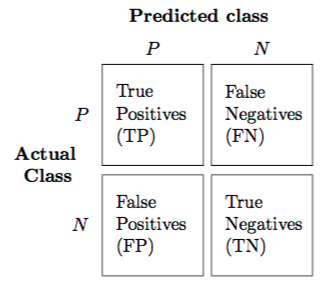

A data set used for performance evaluation is called a test data set. It should contain the correct labels and predicted labels.




The predicted labels will exactly the same if the performance of a binary classifier is perfect.



The predicted labels usually match with part of the observed labels in real-world scenarios.



A binary classifier predicts all data instances of a test data set as either positive or negative. This produces four outcomes-

True-positive(TP) — Correct positive prediction

False-positive(FP) — Incorrect positive prediction

True-negative(TN) — Correct negative prediction

False-negative(FN) — Incorrect negative prediction

https://www.edureka.co/blog/interview-questions/data-science-interview-questions/#machine-learning

<a id = "30"></a><br>
## 4.2.2 Accuracy,Recall,F_Score ...

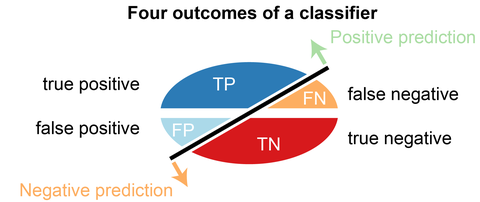

Basic measures derived from the confusion matrix;


Error Rate = (FP+FN)/(P+N)

Accuracy = (TP+TN)/(P+N)

Sensitivity(Recall or True positive rate) = TP/P

Specificity(True negative rate) = TN/N

Precision(Positive predicted value) = TP/(TP+FP)

F-Score(Harmonic mean of precision and recall) = (1+b)(PREC.REC)/(b²PREC+REC) where b is commonly 0.5, 1, 2.

https://www.edureka.co/blog/interview-questions/data-science-interview-questions/#machine-learning

<a id = "31"></a><br>
## 5-) EVALUATION

Evaluate your results

Previous evaluation steps dealt with factors such as the accuracy and generality of the model. During this step you'll assesses the degree to which the model meets your business objectives and seek to determine if there is some business reason why this model is deficient. Another option is to test the model(s) on test applications in the real application, if time and budget constraints permit. The evaluation phase also involves assessing any other data mining results you've generated. Data mining results involve models that are necessarily related to the original business objectives and all other findings that are not necessarily related to the original business objectives, but might also unveil additional challenges, information, or hints for future directions.

https://www.sv-europe.com/crisp-dm-methodology/

<a id = "32"></a><br>
## 6-) DEPLOYMENT

In the deployment stage you'll take your evaluation results and determine a strategy for their deployment. If a general procedure has been identified to create the relevant model(s), this procedure is documented here for later deployment. It makes sense to consider the ways and means of deployment during the business understanding phase as well, because deployment is absolutely crucial to the success of the project. This is where predictive analytics really helps to improve the operational side of your business.

https://www.sv-europe.com/crisp-dm-methodology/